# CRISP DM

In [ ]:
Bussines Understanding

Pada tahap ini membutuhkan pemahaman dalam pengetahuan objek bisnis, bagaimana membangun atau mendapatkan data,
dan bagaimana untuk mencocokan tujuan pemodelan untuk tujuan bisnis sehingga model terbaik dapat dibangun.

- Problem
Kasus ini adalah tentang bank (Thera Bank) yang manajemennya ingin mencari cara untuk mengubah nasabah
prioritas menjadi pelanggan pinjaman pribadi (sambil mempertahankan mereka sebagai depositor).

- Tujuan
Dataset ini diambil dari Kaggle (https://www.kaggle.com/datasets/teertha/personal-loan-modeling)
bertujuan untuk menganalisis dan memprediksi nasabah apakah nasabah telah mengambil tawaran pinjaman pribadi
yang telah diajukan oleh bank atau tidak untuk merancang kampanye dengan target pemasaran yang lebih baik
untuk meningkatkan rasio keberhasilan dengan anggaran minimal.

In [ ]:
Data Understanding

Tahap ini memberikan fondasi analitik untuk sebuah penelitian dengan membuat ringkasaan (summary) dan 
mengidentifikasi potensi masalah dalam data.

Dari pengumpulan data yang telah diambil mengenai peminjaman bank, terdapat 14 kolom yang berisi 1 kolom
float64 dan 13 kolom integer. Jika menggunakan Logistic Regression, maka hanya kolom yang berisi float64 
atau int64 saja yang bisa diolah. Berikut atribut-atribut nya :

0. ID (ID Nasabah)                       = int64  
1. Age (Usia Nasabah)                    = int64  
2. Experience (Lama Tahun Bekerja)       = int64  
3. Income (Pendapatan Nasabah)           = int64  
4. ZIP_Code (Kode Pos)                   = int64  
5. Family (Jumlah Keluarga)              = int64  
6. CCAvg (Rata-rata Pengeluaran dng Kartu Kredit) = float64
7. Education (Pendidikan)                = int64  
8. Mortgage (Anggusarn KPR)              = int64  
9. Personal Loan (Pinjaman Pribadi)      = int64  
10. Securities Account (Keamanan Akun)   = int64  
11. CD Account (Deposito)                = int64  
12. Online (Internet Bank/M-Banking)     = int64  
13. CreditCard (Kartu Kredit)            = int64 

In [ ]:
Data Preparation

Data Preparation
Tahap ini jelas membutuhkan pemikiran yang cukup matang dan usaha yang cukup tinggi untuk memastikan data 
tepat untuk algoritma yang digunakan.

Untuk fitur, data yang digunakan yaitu: 
1. ID
2. Age
3. Experience
4. Income
5. ZIP_Code
6. Family
7. CCAvg
8. Education
9. Mortgage
10. Securities_Account
11. CD_Account
12. Online
13. CreditCard

Sedangkan, yang menjadi target yaitu Personal Loan

In [ ]:
Modeling

Pada tahap ini dilakukan metode statistika dan Machine Learning untuk penentuan terhadap teknik data mining,
alat bantu data mining, dan algoritma data mining yang akan diterapkan.
Model yang digunakan yaitu Logistic Regerssion.

In [ ]:
Evaluation

Evaluasi dilakukan terhadap model yang diterapkan pada tahap sebelumnya dengan tujuan agar model yang ditentukan
dapat sesuai dengan tujuan yang ingin dicapai dalam tahap pertama.

In [ ]:
Deployment

Perencanaan untuk Deployment dimulai selama Business Understanding dan harus menggabungkan
tidak hanya bagaimana untuk menghasilkan nilai model, tetapi juga bagaimana mengkonversi skor keputusan,
dan bagaimana untuk menggabungkan keputusan dalam sistem operasional.
Deployment dilakukan dengan menggunakaan Github untuk menyimpan source code dan streamlit Share
untuk mengaplikasikan source code yang telah diunggah di Github

# Import library

In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [47]:
df = pd.read_csv("Bank_Loan.csv")

In [48]:
df.head(10)

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP_Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


# pisahkan data atribut dengan label

In [50]:
X = df.drop(columns=['Personal Loan'], axis=1)
Y = df['Personal Loan']

In [51]:
print(X)

        ID  Age  Experience  Income  ZIP_Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Securities_Account  CD_Account  Online  CreditCard  
0            0                

In [52]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal Loan, Length: 5000, dtype: int64


# Visualisasi Data

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP_Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64


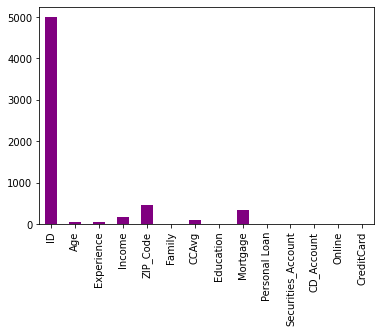

In [53]:
df.nunique().plot(kind='bar',color='purple')
print(df.nunique())

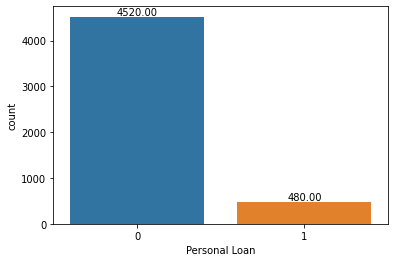

In [54]:
import seaborn as sns
splot = sns.countplot(x = 'Personal Loan', data = df)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

# Split data

In [55]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [56]:
print(X.shape, x_train.shape, x_test.shape)

(5000, 13) (4000, 13) (1000, 13)


# Membuat model training

In [57]:
model = LogisticRegression()

In [58]:
model.fit(x_train, y_train)

LogisticRegression()

# Evaluasi model

In [59]:
x_train_predict = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_predict, y_train)

In [60]:
print('Akurasi data training : ', training_data_accuracy)

Akurasi data training :  0.90875


In [61]:
x_test_predict = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_predict, y_test)

In [62]:
print('Akurasi data testing : ', test_data_accuracy)

Akurasi data testing :  0.907


# Model Prediksi

In [63]:
input_data = (10, 34, 9, 180, 93023, 1, 8.9, 3, 0, 0, 0, 0, 0)
input_data_numpy = np.asarray(input_data)
data_reshaped = input_data_numpy.reshape(1, -1)
predict = model.predict(data_reshaped)
print(predict)

if (predict[0] == 0):
    print('Nasabah tidak menerima tawaran pinjaman personal')
else:
    print('Nasabah menerima tawaran pinjaman personal')

[1]
Nasabah menerima tawaran pinjaman personal


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


# Save Model

In [64]:
import pickle

filename = 'bank.sav'
pickle.dump(model, open(filename, 'wb'))